In [1]:
using Flux
using BSON: @load, @save
using Plots

# 1. NAdam (rate=0.25, G2 10-1, single/multi core)

In [3]:
cd("singlecore/");

In [19]:
gradients = []
for i = 1:10
    iStr = lpad(i, 2, '0')
    @load "gradients-iter-$(iStr).bson" meanLossGradients
    append!(gradients, [meanLossGradients])
end

In [20]:
mutatedGradients = []
for i = 1:10
    iStr = lpad(i, 2, '0')
    @load "gradients-mutated-iter-$(iStr).bson" meanLossGradients
    append!(mutatedGradients, [meanLossGradients])
end

In [28]:
models = []
for i = 1:10
    iStr = lpad(i, 2, '0')
    @load "model-iter-$(iStr).bson" model
    parameters = Flux.params(model)[1]
    append!(models, [parameters])
end

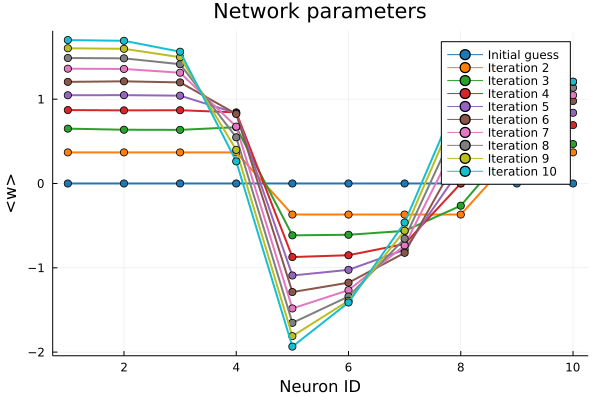

In [37]:
plt = plot(models[1]', title="Network parameters", 
    label="Initial guess", lw=2, marker=(:dot), color=palette(:tab10)[1])
for i = 2:10
    plot!(models[i]', 
        label="Iteration $i", lw=2, marker=(:dot), color=palette(:tab10)[i])
end
xlabel!("Neuron ID")
ylabel!("<w>")
display(plt)

In [41]:
gradients[2][1]

1×10 Matrix{Float64}:
 -4.60298  -10.1707  -16.1183  -5.78441  …  -0.523324  -0.243712  0.0273064

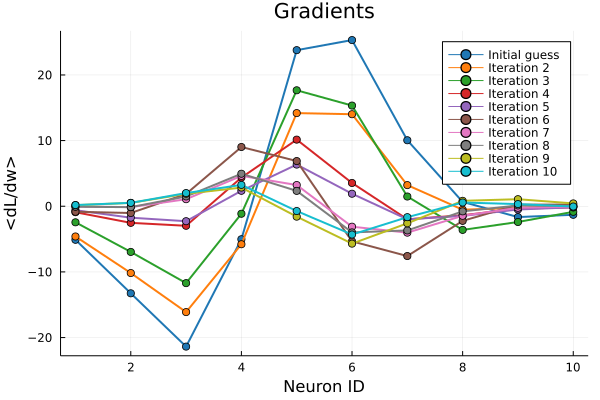

In [42]:
plt = plot(gradients[1][1]', title="Gradients", 
    label="Initial guess", lw=2, marker=(:dot), color=palette(:tab10)[1])
for i = 2:10
    plot!(gradients[i][1]', 
        label="Iteration $i", lw=2, marker=(:dot), color=palette(:tab10)[i])
end

xlabel!("Neuron ID")
ylabel!("<dL/dw>")
display(plt)

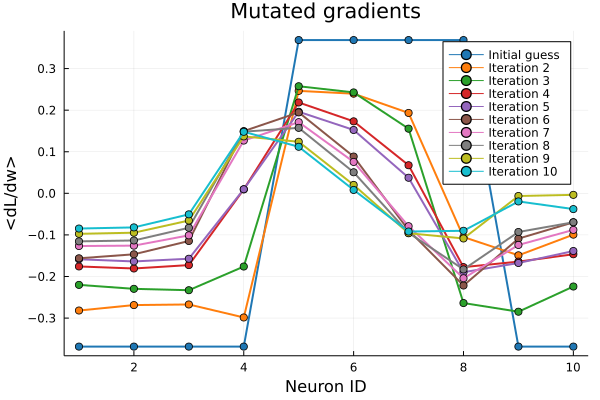

In [43]:
plt = plot(mutatedGradients[1][1]', title="Mutated gradients", 
    label="Initial guess", lw=2, marker=(:dot), color=palette(:tab10)[1])
for i = 2:10
    plot!(mutatedGradients[i][1]', 
        label="Iteration $i", lw=2, marker=(:dot), color=palette(:tab10)[i])
end
xlabel!("Neuron ID")
ylabel!("<dL/dw>")
display(plt)

In [44]:
cd("../multicore/");

In [45]:
gradients = []
for i = 1:10
    iStr = lpad(i, 2, '0')
    @load "gradients-iter-$(iStr).bson" meanLossGradients
    append!(gradients, [meanLossGradients])
end

In [46]:
mutatedGradients = []
for i = 1:10
    iStr = lpad(i, 2, '0')
    @load "gradients-mutated-iter-$(iStr).bson" meanLossGradients
    append!(mutatedGradients, [meanLossGradients])
end

In [47]:
models = []
for i = 1:10
    iStr = lpad(i, 2, '0')
    @load "model-iter-$(iStr).bson" model
    parameters = Flux.params(model)[1]
    append!(models, [parameters])
end

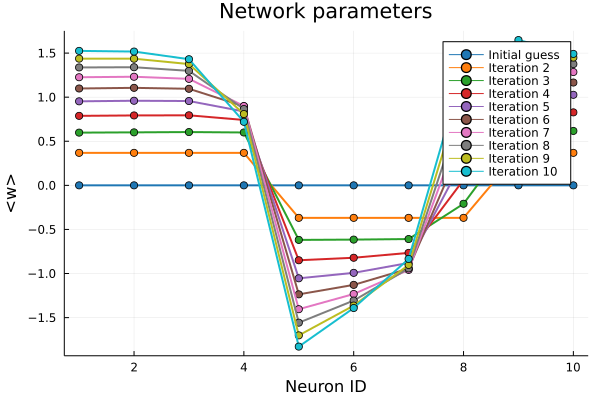

In [48]:
plt = plot(models[1]', title="Network parameters", 
    label="Initial guess", lw=2, marker=(:dot), color=palette(:tab10)[1])
for i = 2:10
    plot!(models[i]', 
        label="Iteration $i", lw=2, marker=(:dot), color=palette(:tab10)[i])
end
xlabel!("Neuron ID")
ylabel!("<w>")
display(plt)

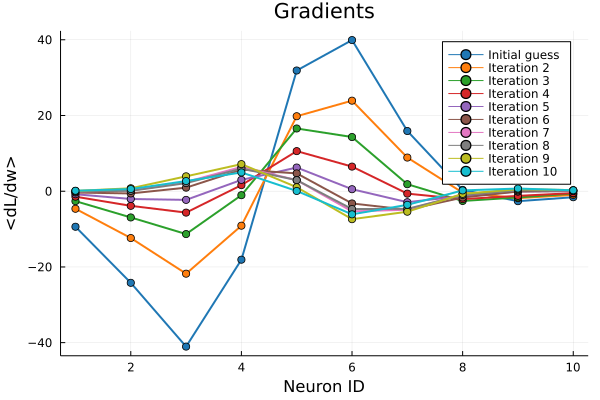

In [49]:
plt = plot(gradients[1][1]', title="Gradients", 
    label="Initial guess", lw=2, marker=(:dot), color=palette(:tab10)[1])
for i = 2:10
    plot!(gradients[i][1]', 
        label="Iteration $i", lw=2, marker=(:dot), color=palette(:tab10)[i])
end

xlabel!("Neuron ID")
ylabel!("<dL/dw>")
display(plt)

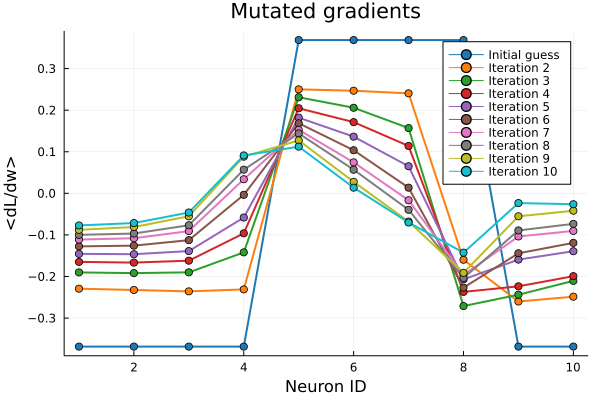

In [50]:
plt = plot(mutatedGradients[1][1]', title="Mutated gradients", 
    label="Initial guess", lw=2, marker=(:dot), color=palette(:tab10)[1])
for i = 2:10
    plot!(mutatedGradients[i][1]', 
        label="Iteration $i", lw=2, marker=(:dot), color=palette(:tab10)[i])
end
xlabel!("Neuron ID")
ylabel!("<dL/dw>")
display(plt)